In [3]:
import pandas as pd

In [2]:
data_synthetic = pd.read_csv("Synthetic_data_v2.csv")
data_synthetic.head(5)

,sex,age_at_adm,category,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg
0,1,76.0,5,80.387129,29.230622,94.689829,141.387354,38.711734
1,1,76.0,7,71.754523,-0.933412,92.819280,165.547790,68.567287
2,1,102.0,5,126.699856,4.847785,100.101327,120.283135,55.474092
3,1,79.0,2,65.671250,25.887425,96.749888,98.077591,31.174128
4,1,76.0,0,74.888688,18.285614,96.411687,148.664657,64.783559


In [3]:
data_synthetic.columns

Index(['sex', 'age_at_adm', 'category', 'Pulse_BPM', 'Resp_Rate_BPM', 'Temp_F',
       'Sys_BP_mmHg', 'Dia_BP_mmHg'],
      dtype='object')

In [4]:
# Checking for Imbalance Data

In [5]:
data_synthetic["category"].value_counts()

0    2105
1    1875
5    1441
6     931
3     883
2     857
7     654
4     633
8     429
9     192
Name: category, dtype: int64

In [6]:
# We have Imbalance classes, so we will upsample using SMOTE

In [7]:
X = data_synthetic.drop("category", axis = 1)
y = data_synthetic["category"]

In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2022)

X_resampled, y_resampled = ros.fit_resample(X, y)

In [9]:
up_data_syn = pd.concat([X_resampled, pd.Series(y_resampled)], axis =1)
up_data_syn.head(5)

,sex,age_at_adm,Pulse_BPM,Resp_Rate_BPM,Temp_F,Sys_BP_mmHg,Dia_BP_mmHg,category
0,1,76.0,80.387129,29.230622,94.689829,141.387354,38.711734,5
1,1,76.0,71.754523,-0.933412,92.819280,165.547790,68.567287,7
2,1,102.0,126.699856,4.847785,100.101327,120.283135,55.474092,5
3,1,79.0,65.671250,25.887425,96.749888,98.077591,31.174128,2
4,1,76.0,74.888688,18.285614,96.411687,148.664657,64.783559,0


In [11]:
up_data_syn.to_csv("upscaled_synthetic_data.csv", index = False)

In [11]:
up_data_syn["category"].value_counts()

5    2105
7    2105
2    2105
0    2105
1    2105
8    2105
3    2105
9    2105
4    2105
6    2105
Name: category, dtype: int64

In [12]:
# Now we will apply various Classification Algorithms

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
# Splitting Data into Train_set and Test_set

In [16]:
train_set, test_set = train_test_split(up_data_syn, test_size = 0.1, random_state = 2022, stratify = up_data_syn["category"])

In [17]:
models = [RandomForestClassifier(),
         LogisticRegression(),
         KNeighborsClassifier(),
         SVC(),
         DecisionTreeClassifier(),
         GaussianNB(),
         GradientBoostingClassifier()]

In [18]:
# Separating x variables from Train_set
x = train_set.drop('category', axis = 1)

# Seaparting y variable from Train_set
y = train_set['category']

# Creating Training and Validation data sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state = 2022)

# Scaling x variables of Train and Validation sets
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

# Separating x variables from Test_set 
x1 = test_set.drop('category', axis = 1)

# Scaling x Varaibles from Test_set
x1_scaled = sc.transform(x1)

# Seaparting y variable from Train_set
y1 = test_set['category']


fr = []

for i in models:
    
    # Training
    model = i
    model.fit(x_train_scaled, y_train)
    pr_train = model.predict(x_train_scaled)
    act_train = y_train
    
    training_score = accuracy_score(act_train, pr_train)
    
    
    # Validation
    pr_val = model.predict(x_val_scaled)
    act_val = y_val
    
    val_score = accuracy_score(act_val, pr_val)
    
    
    # Testing
    pr_test = model.predict(x1_scaled)
    act_test = y1
    
    test_score = accuracy_score(act_test, pr_test)
    
    dict1 = {
        "model": type(model).__name__,
        "Training_score": training_score,
        "Validation_score": val_score,
        "Testing_score": test_score
    }
    
    fr.append(dict1)

In [30]:
initial_results_syn = pd.DataFrame(fr)
initial_results_syn.set_index("model", inplace = True)

In [20]:
initial_results_syn

,Training_score,Validation_score,Testing_score
model,,,
RandomForestClassifier,1.000000,0.812137,0.808551
LogisticRegression,0.194194,0.207916,0.198100
KNeighborsClassifier,0.687507,0.515567,0.492637
SVC,0.302111,0.287071,0.270309
DecisionTreeClassifier,1.000000,0.777309,0.779572
GaussianNB,0.197830,0.212665,0.195249
GradientBoostingClassifier,0.488211,0.419525,0.398100


In [32]:
initial_results

,Training_score,Validation_score,Testing_score
model,,,
RandomForestClassifier,1.000000,0.570755,0.636943
LogisticRegression,0.198689,0.183962,0.174098
KNeighborsClassifier,0.564613,0.372642,0.354565
SVC,0.372739,0.278302,0.278132
DecisionTreeClassifier,1.000000,0.528302,0.628450
GaussianNB,0.210223,0.169811,0.199575
GradientBoostingClassifier,0.605767,0.408019,0.401274


In [1]:
initial_results_syn.to_csv("ML_results_on_Synthetic_data.csv")

In [4]:
initial_results_syn = pd.read_csv("ML_results_on_Synthetic_data.csv", index_col = "model")

In [5]:
# initial_results.to_csv("ML_results_on_Orginal_data.csv")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

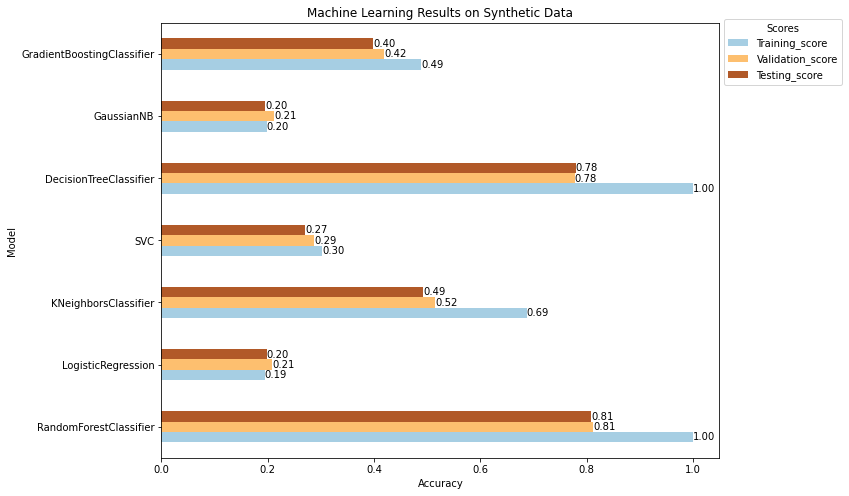

In [10]:
# Plotting ML Results
ax = initial_results_syn.plot(kind='barh', rot=0, xlabel='Model', 
                          ylabel='Accuracy',
                          title='Machine Learning Results on Synthetic Data', figsize=(10, 8),
                          colormap = 'Paired')

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.2f', label_type='edge')
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xlabel("Accuracy")

# move the legend out of the plot
ax.legend(title='Scores', bbox_to_anchor=(1, 1.02), loc='upper left')

plt.savefig("ML_results_on_Synthetic_data.jpeg", bbox_inches = "tight")

Hence, it is proved that providing more data to same Algorithms, yielded better accuraices.

Since RF was better among all, we will now work on RF